#Analisis ETL

##Librerias nesesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime

##Extraccion y carga de lo datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_12/movies_dataset.csv")

<ipython-input-3-dabe066a0e64>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_12/movies_dataset.csv")


In [ ]:
df1

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

###Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [ ]:
df1["budget"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype 
--------------  ----- 
45466 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [ ]:
df1["revenue"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
45460 non-null  float64
dtypes: float64(1)
memory usage: 355.3 KB


<Axes: >

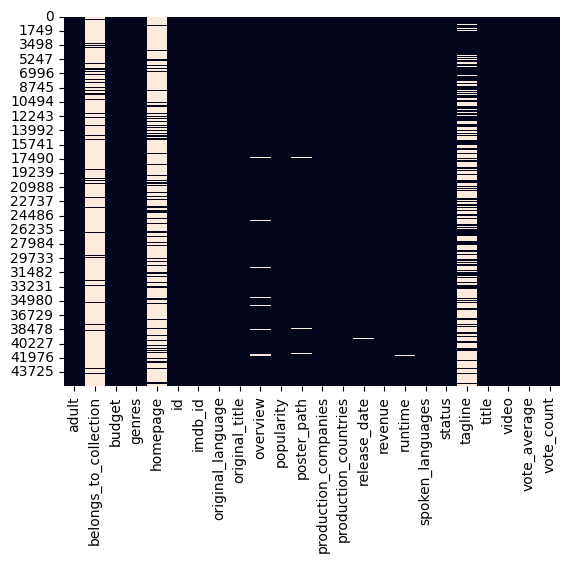

In [ ]:
#visualizo los valore faltantes o nulos
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
#Reemplazo los valores nulos en revenue y budget por 0:
df1["revenue"] = df1["revenue"].replace(np.nan, 0)
df1["budget"] = df1["budget"].replace(np.nan, 0)

###Los valores nulos del campo release date deben eliminarse.

<Axes: >

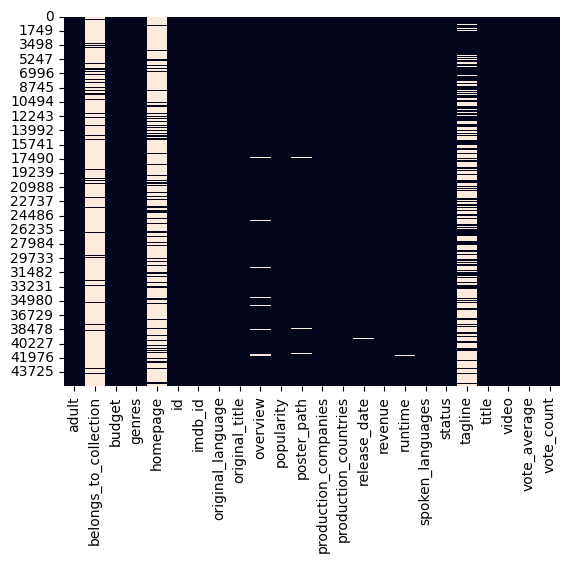

In [ ]:
#visualizo los valore faltantes o nulos
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [ ]:
df1["release_date"].isnull().sum()

87

In [ ]:
#Reviso si el dataset tiene id nulos  y ademas unicos
df1["id"].isnull().sum()

0

In [ ]:
df1["release_date"].describe()

count          45379
unique         17336
top       2008-01-01
freq             136
Name: release_date, dtype: object

In [ ]:
df1.dropna(subset=['release_date'],axis=0, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df1.reset_index(drop=True, inplace=True)
len(df1)

45379

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

<Axes: >

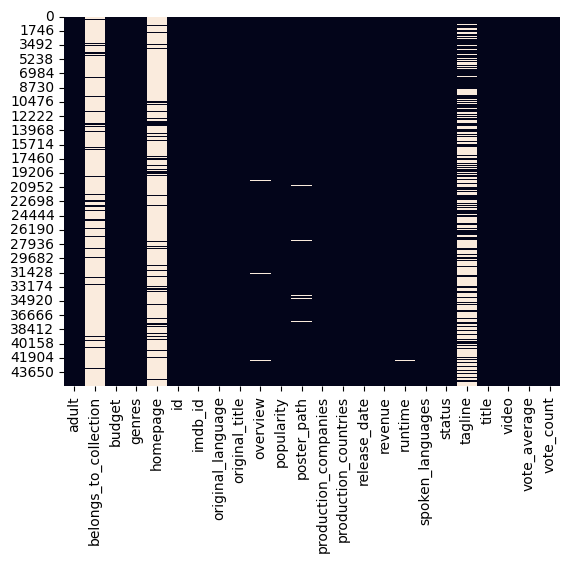

In [ ]:
#visualizo los valores faltantes o nulos y observo que en la column releae  no existen
sns.heatmap(df1.isnull(), cbar=False)


###De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [ ]:
df1["release_date"] = pd.to_datetime(df1["release_date"], format='%Y-%m-%d')
df1['release_date'] = pd.to_datetime (df1['release_date'])

ValueError: ignored

In [ ]:
df1["release_date"]=df1["release_date"].astype('string')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  string 
 15  re

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  string
dtypes: string(1)
memory usage: 354.6 KB


In [ ]:
#identifico las filas con error
for i in df1.index:
     if len(str(df1["release_date"][i]))<10:
            print("posicion o fila",[i],"dato",df1["release_date"][i])
            print("error")


posicion o fila [19714] dato 1
error
posicion o fila [29472] dato 12
error
posicion o fila [35543] dato 22
error


In [ ]:
df1.iloc[29472]

adult                     Rune Balot goes to a casino connected to the ...
belongs_to_collection                                             1.931659
budget                                    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
genres                   [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...
homepage                 [{'iso_3166_1': 'US', 'name': 'United States o...
id                                                              2012-09-29
imdb_id                                                                  0
original_language                                                     68.0
original_title                        [{'iso_639_1': 'ja', 'name': '日本語'}]
overview                                                          Released
popularity                                                             NaN
poster_path                            Mardock Scramble: The Third Exhaust
production_companies                                                 False
production_countries     

In [ ]:
df1.iloc[35543]

adult                     Avalanche Sharks tells the story of a bikini ...
belongs_to_collection                                             2.185485
budget                                    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
genres                   [{'name': 'Odyssey Media', 'id': 17161}, {'nam...
homepage                          [{'iso_3166_1': 'CA', 'name': 'Canada'}]
id                                                              2014-01-01
imdb_id                                                                  0
original_language                                                     82.0
original_title                    [{'iso_639_1': 'en', 'name': 'English'}]
overview                                                          Released
popularity                                           Beware Of Frost Bites
poster_path                                               Avalanche Sharks
production_companies                                                 False
production_countries     

In [ ]:
# elemento a borrar
df1.drop([19714], axis=0, inplace=True)
df1.iloc[19714]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                            21000000
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
homepage                            http://silverliningsplaybookmovie.com/
id                                                                   82693
imdb_id                                                          tt1045658
original_language                                                       en
original_title                                     Silver Linings Playbook
overview                 After spending eight months in a mental instit...
popularity                                                       14.488111
poster_path                               /ilrZAV2klTB0FLxLb01bOp5pzD9.jpg
production_companies        [{'name': 'The Weinstein Company', 'id': 308}]
production_countries     

In [ ]:
#elemento a borrar,luego de revizar
df1.drop([29472], axis=0, inplace=True)
df1.iloc[29472]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 99, 'name': 'Documentary'}, {'id': 107...
homepage                                                               NaN
id                                                                  111771
imdb_id                                                          tt2006869
original_language                                                       en
original_title                                          The Four Year Plan
overview                 In 2007 Queens Park Rangers, a small Football ...
popularity                                                        0.079713
poster_path                               /hlemWZPI8Ijl2TKR6HFhBFoJaSP.jpg
production_companies                                                    []
production_countries     

In [ ]:
df1.drop([35543], axis=0, inplace=True)
df1.iloc[35543]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
homepage                                                               NaN
id                                                                   95134
imdb_id                                                          tt0012952
original_language                                                       en
original_title                                              Blood and Sand
overview                 Juan is the son of a poor widow in Seville. Ag...
popularity                                                        0.270647
poster_path                               /op0LsbucryeyRXE848l5QPA0miA.jpg
production_companies     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
production_countries     

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45378
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45376 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45376 non-null  object 
 3   genres                 45376 non-null  object 
 4   homepage               7766 non-null   object 
 5   id                     45376 non-null  object 
 6   imdb_id                45362 non-null  object 
 7   original_language      45365 non-null  object 
 8   original_title         45376 non-null  object 
 9   overview               44435 non-null  object 
 10  popularity             45376 non-null  object 
 11  poster_path            45037 non-null  object 
 12  production_companies   45376 non-null  object 
 13  production_countries   45376 non-null  object 
 14  release_date           45376 non-null  string 
 15  re

In [ ]:
#Reinicio indices
df1.reset_index(drop=True, inplace=True)
len(df1)

45376

In [ ]:
for i in df1.index:
     if len(str(df1["release_date"][i]))<10:
            print(i)
            print(df1["release_date"][i])
            print("error")
# no arroja resultados

In [ ]:
#opcion para determinar i funcion ignorando el error
#df4["release_date"] =  pd.to_datetime(df4["release_date"], format='%Y-%m-%d', errors='ignore')

#forma correcta luego de corregir errores
df1["release_date"] =  pd.to_datetime(df1["release_date"], format="%Y-%m-%d")

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45376 entries, 0 to 45375
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 354.6 KB


Se creo la serie para evitar:   SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame y asignarla lo cual lo corrigo par crear columna release_year

In [ ]:
#Se creo la serie para evitar:   SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
# y asignarla lo cual lo corrigio
df = pd.Series([])
for i in df1["release_date"].index:
    cop=datetime.strftime(df1["release_date"][i],'%Y')
    df [i]= cop


<ipython-input-35-ee200395f2ad>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series([])


In [ ]:
df.info()

<class 'pandas.core.series.Series'>
Int64Index: 45376 entries, 0 to 45375
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
45376 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB


In [ ]:
df

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45371    1991
45372    2011
45373    2003
45374    1917
45375    2017
Length: 45376, dtype: object

In [ ]:
df1["release_year"]=df

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45376 non-null  object        
 1   belongs_to_collection  4488 non-null   object        
 2   budget                 45376 non-null  object        
 3   genres                 45376 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45376 non-null  object        
 6   imdb_id                45362 non-null  object        
 7   original_language      45365 non-null  object        
 8   original_title         45376 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45376 non-null  object        
 11  poster_path            45037 non-null  object        
 12  production_companies   45376 non-null  object        
 13  p

In [ ]:
df1["release_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45376 entries, 0 to 45375
Series name: release_year
Non-Null Count  Dtype 
--------------  ----- 
45376 non-null  object
dtypes: object(1)
memory usage: 354.6+ KB


In [ ]:
df1["release_year"]

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45371    1991
45372    2011
45373    2003
45374    1917
45375    2017
Name: release_year, Length: 45376, dtype: object

### 5-Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

In [ ]:
df1.budget = pd.to_numeric(df1.budget, downcast='float')

In [ ]:
#  posicion donde se encuentra el error  contiene una direccion de un archivo de
#  imagen a reemplazar:
df1.iloc[19714,2] # reviso que el dato contenido en la columna 2 sea operable


21000000.0

In [ ]:
# Esta opcion convertia a numerico posibilitando la operacion de diviion pero
# el error debia tratarse, pd.to_numeric(df1.budget , errors='ignore')
pd.to_numeric(df1.budget)

0        30000000.0
1        65000000.0
2               0.0
3        16000000.0
4               0.0
            ...    
45371           0.0
45372           0.0
45373           0.0
45374           0.0
45375           0.0
Name: budget, Length: 45376, dtype: float64

In [ ]:
df1["budget"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45376 entries, 0 to 45375
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB


In [ ]:
#Busco errores de tipo y valor en cada fila
df1.budget = pd.to_numeric(df1.budget, downcast='float')

In [ ]:
df1.iloc[29472,2]

0.0

In [ ]:
df1.iloc[35543,2]

0.0

In [ ]:
df1.budget = pd.to_numeric(df1.budget, downcast='float')

In [ ]:
df1.budget.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45376 entries, 0 to 45375
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB


In [ ]:
# opcion para convertir tipo de dato que requeria previo tratamiento
# df4["budget"]=df4["budget"].astype('float64')

creo la columna return operando sobre la columna budget y revenue

In [ ]:
#creo la columna return operando sobre la columna budget y revenue
for i in range(len(df1)):
      if df1["budget"][i]==0 :
          df1["return"][i]=0
          continue
      elif df1["revenue"][i]==0:
          df1["return"][i]=0
      else:
          df1['return'][i]=df1['revenue'][i]/df1['budget'][i]


<ipython-input-60-3f53a0a9c20a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'][i]=df1['revenue'][i]/df1['budget'][i]


In [ ]:
df1[df1["return"]!=0.0]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
5,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,3.123947
8,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,International action superstar Jean Claude Van...,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,5.5,174.0,1995,1.838576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,NaN,12000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",24049,ta,Corrupt police and politicians target a comput...,1.323587,"[{'name': 'AVM Productions', 'id': 16424}]","[{'iso_3166_1': 'IN', 'name': 'India'}]",2007-06-14,19000000.0,185.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}, {'iso_6...",Released,NaN,Sivaji: The Boss,6.9,25.0,2007,1.583333
45311,NaN,750000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,ru,NaN,0.201582,"[{'name': 'Кинокомпания «Lunapark»', 'id': 420...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-06-05,3.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,All at Once,6.0,4.0,2014,0.000004
45321,NaN,800000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,en,"The sea, August, interesting and simple people...",0.903061,[],[],2006-11-23,1328612.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Savages,5.8,6.0,2006,1.660765
45323,NaN,2000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,en,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,1268793.0,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pro Lyuboff,4.0,3.0,2010,0.634397


In [ ]:
df1["return"].describe()

count    4.537600e+04
mean     6.600428e+02
std      7.469329e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.239638e+07
Name: return, dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45376 non-null  object        
 1   belongs_to_collection  4488 non-null   object        
 2   budget                 45376 non-null  float64       
 3   genres                 45376 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45376 non-null  object        
 6   imdb_id                45362 non-null  object        
 7   original_language      45365 non-null  object        
 8   original_title         45376 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45376 non-null  object        
 11  poster_path            45037 non-null  object        
 12  production_companies   45376 non-null  object        
 13  p

###6-Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.


In [ ]:
df1.drop(['video','imdb_id','adult','original_title','poster_path','homepage'], axis = 'columns', inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45365 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  s

In [ ]:
df1.to_csv('ETL_pi_movies.csv', index=False)